РАЗВЕДЫВАТЕЛЬНЫЙ АНАЛИЗ ДАННЫХ

1.О науке о данных.
данные поступают из вешнего мира отовсюду: показаний датчиков, фотографий, видео, текст, последовательность нажатий клавиш пользователем. Все это данные. Фотографии представляют собой набор пикселов, а каждый из пикселов это информация о цвете (RGB). 
ГЛАВНАЯ ЗАДАЧА НАУКИ О ДАННЫХ - это переработать потки данных в информацию имеюющую практическое значение 

2. ТИПЫ ДАННЫХ
Базовые типы: числовые (непрерывная форма и дискретная) и категориальные(бинарные=двоичные=булевая величина и порядковые)

3. ПРЯМОУГОЛЬНЫЕ ДАННЫЕ - это общий термин для двумерной матрицы или таблицы. Строки=записи=экземпляр=случай=паттерн, столбцы=признаки=предсказатель=предиктор=атрибут
КАДР ДАННЫХ = dataframe

4. БЫВАЮТ 2 РАЗМЕРНОСТИ (ОЦЕНКИ) В ОБОБЩЕНИИ ПРИЗНАКА: оценка центрального положения и оценка вариабельности = дисперсность
Оценка центрального положения.
Базовый шаг в разведывательном анализе данных - это определение типичного значения для каждого признка(столбца, переменной). Под типичным признаком будем понимать оценку того где распольжено большинство  данных (оценка центральной тенденции)

In [ ]:
5. Ключевые термины оценок центрального положения:
 - среднее mean
 - среднее взвешенное weight mean
 - медиана median
 - медиана взвешенная weight median
 - среднее усеченное trimmed mean
 - робастное robust
 - выброс outlier

6. МЕДИАНА РОБАСТНАЯ ОЦЕНКА ЦЕНТРЕЛЬНОЙ ТЕНДЕНЦИИ. Так как она не находится под влиянием выбросов. Среднеее усеченное иногда альтернатива медиане.
БАЗОВАЯ МЕТРИКА ОЦЕНКИ СРЕДНЕГО ПОЛОЖЕНИЯ - это среднее, но оно чувствительно в предельным значениям(выбросам)

7. ПРИМЕР ПРО УРОВЕНЬ УБИЙСТВ В ШТАТАХ

In [19]:
import pandas as pd
import numpy as np

state = pd.read_csv("/Users/tatanaternovaa/Documents/training-skills/table1.csv")
state["population"].mean()
np.average(state['murder_rate'],weights=state['population'])

4.376359279149048

8. ДИСПЕРСНОСТЬ или ОЦЕНКИ ВАРИАБЕЛЬНОСТИ это СТАТИСТИКИ ВАРИАБЕЛЬНОСТИ (размерность в обобщении признака), которая показывает насколько плотно сгруппированы значения данных (плотно или разбросаны)

9. Степени свободы (n или n-1) ??
В формуле дисперсии иногда пишут в знаменателе n а иногда n-1. В общем при большом n это не имеет значения. Если в знаменателе поставить n-1 то истинные оценки дисперсии будут недооценины - такая оценка называется смещенной

10. ОЦЕНКА дисперсии:
В наборе данных P процентиль называется таким значением, что P% и меньше принимает это значение или меньше его.
Медиана это тоже самое что 50% персентиль.
ОБЩЕПРИНЯТАЯ МЕРА ВАРИАБЕЛЬНОСТИ это разница между 25 и 75 процентилями (IQR)

In [22]:
state["population"].std()
state["population"].quantile(0.75) - state["population"].quantile(0.5)

1192984.75

11. РАЗВЕДЫВАНИЕ РАСПРЕДЕЛЕНИЯ ДАННЫХ (полезно знать как данные распределены в совокупности)
Оценки вариабельности и центрального положения дают нам число по которому мы можем описать данные. Но часто полезно знать как распределны данные в совокупности.

12. КОРОБЧАТЫЕ ДИАГРАММЫ (boxplot)
Коробчатые диаграммы основаны на процентилях и дают быстрый способ визуализации распределения данных.
Из диаграммы ниже сразу видно что медианная численность населения штатов равно 5 млн человек.
Половина штатов имеет население от 2-ч миллионов до 7 миллионов и существуют некоторые выбросы с высоким населением.


Text(0, 0.5, 'population, million')

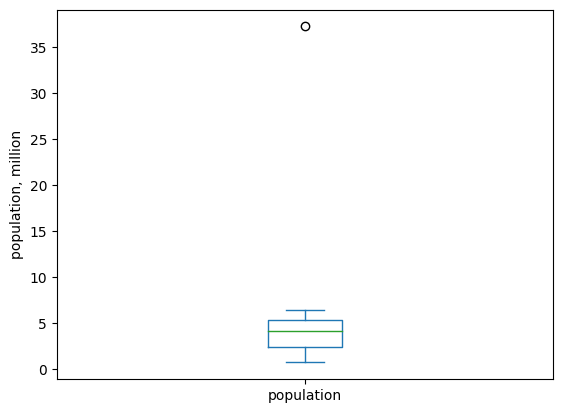

In [23]:
ax=(state['population']/1000000).plot.box()
ax.set_ylabel('population, million')

13. ЧАСТОТНЫЕ ТАБЛИЦЫ И ДИАГРАММЫ 
Частотная таблица делит диапазон перемнной на равностоящие сегменты и сообщает о том сколько значений попадает в каждый сегмент
гистограмма - это способ визуализации частотной таблицы

In [28]:
binned_pop = pd.cut(state["population"], 10)
binned_pop.value_counts()

population
(673687.275, 4364603.5]     4
(4364603.5, 8018976.0]      3
(33599583.5, 37253956.0]    1
(8018976.0, 11673348.5]     0
(11673348.5, 15327721.0]    0
(15327721.0, 18982093.5]    0
(18982093.5, 22636466.0]    0
(22636466.0, 26290838.5]    0
(26290838.5, 29945211.0]    0
(29945211.0, 33599583.5]    0
Name: count, dtype: int64

Text(0.5, 0, 'population')

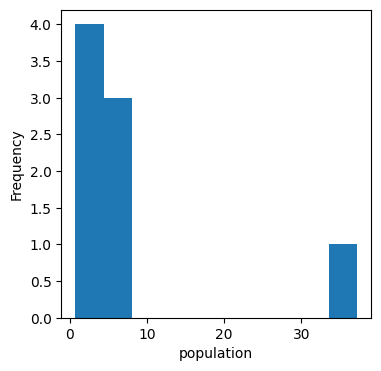

In [35]:
ax=(state['population']/1_000_000).plot.hist(figsize=(4,4))
ax.set_xlabel('population')

14. ГРАФИКИ И ОЦЕНКИ ПЛОТНОСТИ
С гистограммой тесно связан график плотности, которые показывает распределение значений данных в виде сплошной линии.
График плотности можно рассматривать как сглаженную гистограмму

/Users/tatanaternovaa/Documents/training-skills/.venv/lib/python3.10/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: divide by zero encountered in divide
  return n/db/n.sum(), bin_edges
/Users/tatanaternovaa/Documents/training-skills/.venv/lib/python3.10/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


Text(0.5, 0, 'уровень убийств а 100000 человек')

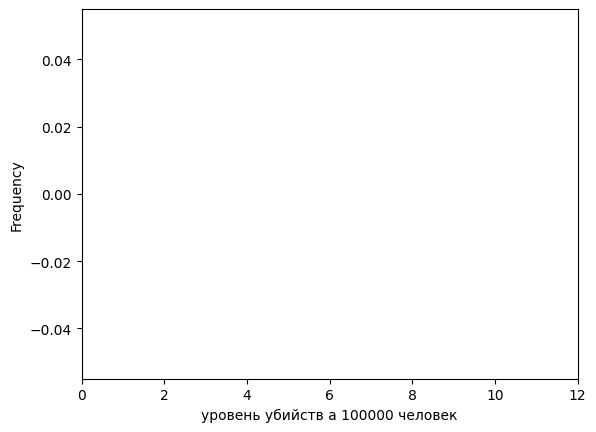

In [39]:
ax=state['population'].plot.hist(density=True,xlim=[0,12],bins=range(1,12))
state['murder_rate'].plot.density
ax.set_xlabel('уровень убийств а 100000 человек')

15. Разведывание двоичных и категориальных данных
Как правило, категориальные данные обобщаются в долях и их можно визуализировать на столбиковой диаграмме.

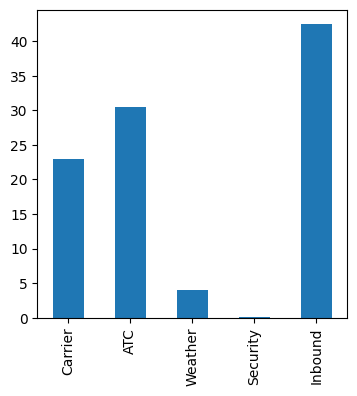

In [8]:
import pandas as pd
dfw = pd.read_csv("/Users/tatanaternovaa/Documents/training-skills/table3.csv")
ax = dfw.transpose().plot.bar(figsize=(4,4),legend=False)


16. МАТЕМАТИЧЕСКОЕ ОЖИДАНИЕ (ожидаемое значение) - это сумма значений умнлженная на вероятность их наступления